# Week 11 -  Final Assignment

**_Author: Jessica Cervi_**

**Expected time = 3.5 hours**



## Assignment overview

Welcome to the final assignment of this course! At this point, you have learnt about different machine learning algorithms and you have applied each of them to different problems. In this assignment, we will instead use one single data set and try make a prediction by using different algorithms with the goal of deciding which one performs the best.

After reading the data set, we will perfom some exploratory data analysis to undertand the relationship between some of the features in the data set. Next, we will extensively manipulate the dataframe to prepare our data for our analysis. We will do so by using techniques such as label encoding, one hot encoding and correlation. Finally, we will apply three different machine learning algorithms to solve our problem.

This assignment is designed to help you apply the machine learning algorithms you have learned using packages in Python. Python concepts, instructions, and a starter code are embedded within this Jupyter Notebook to help guide you as you progress through the assignment. Remember to run the code of each code cell prior to submitting the assignment. Upon completing the assignment, we encourage you to compare your work against the solution file to perform a self-assessment.

### Learning objectives



- Define the hypothesis to be tested and prediction to be made
- Present the approaches used in the analysis
- Discuss the results obtained using different algorithms
- Discuss the strengths and limitations of each analysis


## Index:

#### Week 11: final assignment


- [Part 1](#part1)- Importing the data set
- [Part 2](#part2)- Exploratory data analysis (EDA)
- [Part 3](#part3) -  Preparing our data
- [Part 4](#part4) -  Correlation
- [Part 5](#part5) -  Splitting our data for modelling
- [Part 6](#part6) -  Decision tree model (reservation_status included)
- [Part 7](#part7) -  Decision tree model (reservation_status excluded)
- [Part 8](#part8) -  K-nearest neighbours
- [Part 9](#part9) -  Naïve Bayes
- [Part 10](#part10) -  Conclusion


## Final assignment

In the past weeks, we have learnt about different machine mearning algorithms that allowed us to analyse and make predictions on different data sets.

Now that we have come to end of this course, it is time to compare the performances of some of these algorithms, analyse the results, and discuss the strengths and limitations of each of them.

The data set that we will be using in this assignment contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. You can find more information about the data set [here](https://www.kaggle.com/jessemostipak/hotel-booking-demand).

The aim is to create meaningful estimators from the data set we have and to select the model that predicts the cancellation best by comparing them with the accuracy scores of different machine learning models. 

As you can imagine, the cancellation rate for bookings in the online booking industry is quite high. Once the reservation has been cancelled, there is almost nothing to be done. This may creates discomfort for many hotels and thus creates a necessity to take precautions. Therefore, predicting reservations that can be cancelled and preventing these cancellations can create a positive value for the hotels. 

[Back to top](#Index:) 

<a id='part1'></a>

### Part 1 -  Importing the data set

As usual, we will begin this assignment by importing the necessary libraries and the data set.

Run the code cell below to import some of the libraries that we will need throughout this assignment.

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

 We will then use `pandas` to import the data set. Complete the code cell below by adding the name of the dataset, "hotel_bookings.csv" as a `str` to `.read_csv()`. Assign the dataframe to the variable `df`.

In [99]:
df=pd.read_csv("hotel_bookings.csv")


Before building any machine learning algorithms, we should explore the data.

We begin by visualizing the first ten rows of the DataFrame `df` using the function `.head()`. By default, `.head()` displays the first five rows of a DataFrame.

Complete the code cell below by passing the desired number of rows as an `int` to the function `.head()`.

In [100]:
df.head(10)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


Here's a description of what some of the features in the dataframe above represent:

- `hotelHotel` (H1 = Resort Hotel or H2 = City Hotel)
- `is_canceled`: value indicating if the booking was canceled (1) or not (0)
- `lead_time`: number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- `stays_in_weekend_nights`: number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- `stays_in_week_nights`: number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- `previous_cancellations`: number of previous bookings that were cancelled by the customer prior to the current booking
- `previous_bookings_not_canceled`: number of previous bookings not cancelled by the customer prior to the current booking
- `booking_changes`: number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- `deposit_type`: indication if the customer made a deposit to guarantee the booking. This variable can assume three categories: 
    - No Deposit – no deposit was made
    - Non Refund – a deposit was made in the value of the total stay cost
    - Refundable – a deposit was made with a value under the total cost of stay
- `market_segment`: market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
- `Type of booking`, assuming one of four categories:
    - Contract - when the booking has an allotment or another type of contract associated to it; 
    - Group – when the booking is associated to a group
    - Transient – when the booking is not part of a group or contract, and is not associated to another transient booking
    - Transient-party – when the booking is transient, but is associated to at least one other transient booking
- `reservation_status_date`: date at which the last status was set. 
- `reservation_status`: status to understand when the booking was canceled or when the customer checked-out of the hotel

Finally, it is always useful to get a sense of how many missing values there are in a dataframe.

Run the code cell below to print the number of NaN's for each colum in our dataframe.

In [101]:
print("# of NaN in each columns:", df.isnull().sum(), sep='\n')

# of NaN in each columns:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                          

[Back to top](#Index:) 

<a id='part2'></a>

### Part 2 -  Exploratory data analysis (EDA)

To make sure we consider all the correct features to make an accurate prediction, it may be useful to create some plots to have a better understanding of our data.

**Note:** In this part of the assignment, we will be using the Python data visualisation library `seaborn`. Links to the documentation of each function used in this part will be given below.


We could begin by visualising the number of cancellations by repeated guests. A good approach to do so is by using a [count plot](https://seaborn.pydata.org/generated/seaborn.countplot.html), or barplot, that shows the counts of observations in each categorical bin using bars.

Complete the code in the code cell below by setting the following parameters of the function `countplot()`:
- x = "is_canceled", 
- hue = 'is_repeated_guest',
- data = df

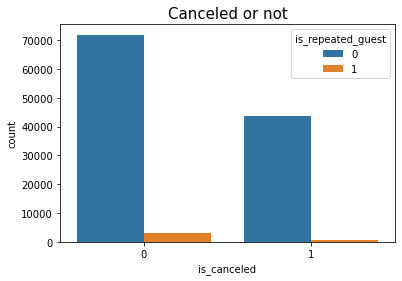

In [102]:
#plot title
plt.title("Canceled or not", fontdict = {'fontsize': 15})

ax = sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = df)

In [103]:
df[df["is_repeated_guest"] == 1]["is_repeated_guest"]

13937     1
14681     1
14777     1
14817     1
14823     1
         ..
117701    1
117841    1
117961    1
118029    1
119070    1
Name: is_repeated_guest, Length: 3810, dtype: int64

In [104]:
df[df["is_repeated_guest"] == 0]["is_repeated_guest"]

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_repeated_guest, Length: 115580, dtype: int64

In [105]:
df[df["is_canceled"] == 1]["is_canceled"]

8         1
9         1
10        1
27        1
32        1
         ..
110280    1
111355    1
111924    1
111925    1
117295    1
Name: is_canceled, Length: 44224, dtype: int64

In [106]:
df[df["is_canceled"] == 0]["is_canceled"]

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 75166, dtype: int64

What can you infer from the figure above?

**To make a conclusion based on the histonram data, we additionally checked the dataframe data as follows:**

df[df["is_repeated_guest"] == 1]["is_repeated_guest"]

df[df["is_repeated_guest"] == 0]["is_repeated_guest"]

df[df["is_canceled"] == 1]["is_canceled"]

df[df["is_canceled"] == 0]["is_canceled"]

**we see that the values in these columns are 0 or 1**

**Column "is_repeated_guest":**
If the value is 1, it means the person is a repeat guest at this hotel.
If the value is 0, this means that the person first visited this hotel.

**Column "is_canceled":**
If the value is 1, it means the person person canceled hotel booking.
If the value is 0, this means that the person didn't cancel hotel booking.

The X axis of our histogram represents the parameter "is_canceled".

For each value of the parameter X ("is_canceled") 
there are 2 columns (different colors: blue and orange)
which indicate whether this customer is a repeat guest at this hotel.

**"is_repeated_guest":**

"blue" - not repeated

"orange" - is repeated


**DOUBLE CLICK ON THIS CELL TO TYPE YOUR ANSWER**




Next, it may be interesting to look at the distribution of market segments by deposit type.

Again, we can use a count plot to visualise this.

Complete the code in the code cell below by setting the following parameters of the function `countplot()`:
- x = "market_segment", 
- hue = 'deposit_type',
- data = df

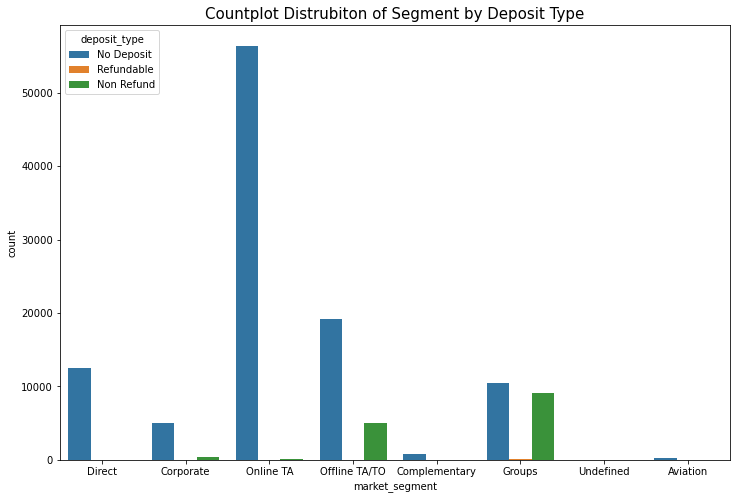

In [107]:
#plot size
plt.figure(figsize = (12,8))
#plot title
plt.title("Countplot Distrubiton of Segment by Deposit Type", fontdict = {'fontsize':15})

ax = sns.countplot(x = "market_segment", hue = 'deposit_type', data = df)

Next, it may be interesting to look at the distribution of market segments by cancellation.

Complete the code in the code cell below by setting the following parameters of the function `countplot()`:
- x = "market_segment", 
- hue = 'is_canceled',
- data = df

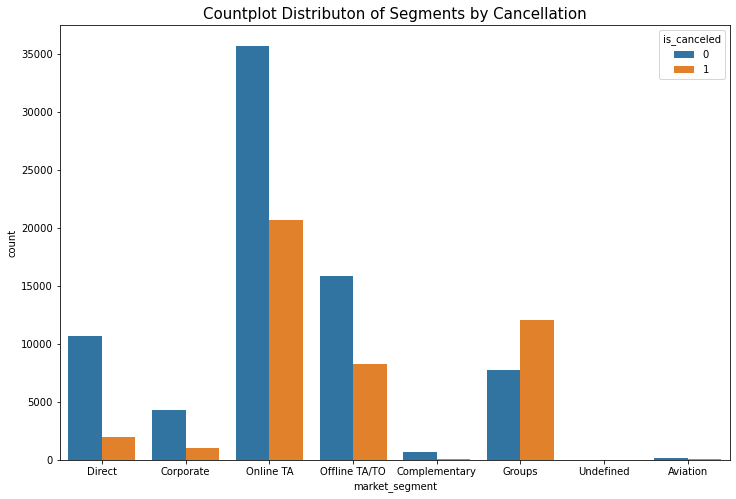

In [108]:
plt.figure(figsize = (12,8))
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':15})

ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = df)

Looking at Offline TA/TO and Groups, the situations where the deposit was received were only in the scenarios where the groups came. It is quite logical to apply a deposit for a large number of customers who will fill important amount of the hotel capacity.

As a first thought, we expected the cancellation rate to be lower in the market segments where deposits are applied. But when we look at the cancellations by market segment, it seems that this is not the case. Deposits were applied to Offline TA/TO and Groups reservations, and not for Direct reservations:

- Groups segment has a cancellation rate more than 50%.
- Offline TA/TO (Travel Agents/Tour Operators) and Online TA has a cancellation rate more than 33%.
- Direct segment has a cancellation rate less than 20%.

It is surprising that the cancellation rate in the first two segments is high despite the application of a deposit. The fact that cancellations are made collectively, like reservations, may explain this situation a bit.

Another insight that looks interesting is that the cancellation rate in the direct segment is very low. We might hypothesise that a mutual trust relationship has been established in the cases where people are communicating one to one.

[Back to top](#Index:) 

<a id='part3'></a>

### Part 3 -  Preparing our data
    

In Part 1, we saw that the columns `Company`, `Agent` and `Country` had missing values. Before deciding whether it is a good idea to drop these columns or keep some of them and try to fill the values using imputation, it is always useful to have an understanding of the percentage of missing values.

In the code cell below define a function called `perc_mv`. Your function should take, as input a dataframe `x` and a series `y`. Your function should compute the percentage of missing values in the series `y` by using the formula:

$$perc = \frac{\sum (\text{Null values in y})}{\text{len}(x)}*100$$

Your function should return the variable `perc`.

**HINT:** You can compute the sum of null values in `y` by using the same code we used in Part 1 to print the number of missing values for each column. Next, you can sum these null values using the function `sum()`.

In [109]:
def perc_mv(x, y):
    #compute percentage
    return df.isnull().sum()/ len(x) * 100
    

Run the code cell below to print the percentange of missing values in each column:

In [110]:
print('Missing value ratios:\nCompany: {}\nAgent: {}\nCountry: {}\nChildren: {}'.format(
    perc_mv(df, df['company']),
    perc_mv(df, df['agent']),
    perc_mv(df, df['country']), 
    perc_mv(df, df['children'])))

Missing value ratios:
Company: hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
d

As we can see, 94.3% of company column has missing values. Therefore, we do not have enough values to fill the rows of the Company column via any imputation method. The best option is to drop the company column.

In the code cell below, use the function `drop()` to drop the column `Company` from the dataframe. Set the argument `axis =1`.

In [111]:
df.drop(["company"], axis=1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [112]:
df = df.drop(["company"], axis=1)

We have also four missing values in the `children` column. If there is no information about children, we might infer that those customers do not have any children.

Complete the code cell below so to fill the missing values in the column `children` with 0. Use the function `fillna()`.


In [113]:
df['children'].isna().astype(int).sum()

4

In [114]:
df.fillna(value={"children": 0})['children'].isna().astype(int).sum()

0

In [115]:
df['children'] = df.fillna(value={"children": 0})['children']

In [116]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


Next, we may want to check the features to create some more meaningful variables and reduce the number of features.

In the code cell below, use the attribute `dtype` on `df` to retrieve the data type for each column.

In [117]:
#use dtype on df
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Let's begin with the column `hotel`. 

Redefine this column so that it has value 1 if the entry is `Resort Hotel` and value 0 if the entry is `City Hotel`

**HINT**: You can accomplish this in a number of ways, such as using a list comprehension and/or by using a lambda function. Here's a pseucode to help you achieve this:

```Python
df['hotel'] = [1 if x is equal to "Resort Hotel"  or 0 otherwise for x in df['hotel']]
```

In [118]:
df['hotel'] = [1 if x == "Resort Hotel" else 0  for x in df['hotel']]
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,1,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,1,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,1,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,1,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [119]:
df[df['hotel'] == 1].shape

(40060, 31)

In [120]:
df[df['hotel'] == 0].shape

(79330, 31)

Next, we will take of the column `arrival_date_month`.

Here, we want to map the name of each month to the corresponding calendar number (January = 1, February  = 2 and so on). Complete the code cell below by filling the remaining months inside the function `map()`

In [121]:
#complete the code cell below
df['arrival_date_month'] = df['arrival_date_month'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June':6, 'July': 7, 'August':8, 'September': 9, 'October': 10, 'November': 11, 'December': 12})
df['arrival_date_month'].sample(10)

95497     8
24405     5
16337     8
34301     3
63138     2
43070     9
108436    3
35066     4
56549     9
6790      7
Name: arrival_date_month, dtype: int64

Next, let's try to summarize some features in a smart way.

It may be interesting to include in our analysis whether a reservation was made by  a family or not. We don't really have this information yet, but we can assume that if the total number of adults and the number of babies or children are greater than zero then the reservation was made for a family.

In the code cell below, complete the definition of the function `family`. This function takes, as input, a dataframe `data` and returns a value `val` defined in the following way:

```python
def family(data):
    if number of adults > 0 and number of children > 0:
        val = 1
    elif number of adults > 0 and number of babies > 0:
        val = 1
    else:
        val = 0
    return val
```

Your function should return val.

In [122]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [123]:
def family(data):
    #if number of adults > 0 and number of children > 0:
    if data['adults'] > 0 and data['children'] > 0:
        val = 1
    #elif number of adults > 0 and number of babies > 0:
    elif data['adults'] > 0 and data['babies'] > 0:
        val = 1
    else:
        val = 0
    return val

Next, we can try to somehow encode some information about the deposit.

In the code cell below, complete the definition of the function `deposit` that takes, as input, a dataframe `data`. Your function should return 0 if no deposit was paid or if the deposit type was refundable and 1 otherwise. Note that this information can be extracted from the column `deposit_type`.

```python
def deposit(data):
    if no deposit or refundable deposit:
        return 0
    else:
        return 1
```

In [124]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [125]:
def deposit(data):
    #if no deposit or refundable deposit:
    if data['deposit_type'] == 'No Deposit' or data['deposit_type'] == 'Refundable':
        return 0
    else:
        return 1  

In the code cell below we have defined a function `feature()` that takes a dataframe as input and applies the functions defined above to that dataframe.

In [126]:
def feature(data):
    data["is_family"] = family(data)
    data["total_customer"] = data["adults"] + data["children"] + data["babies"]
    data["deposit_given"] = deposit(data) 
    data["total_nights"] = data["stays_in_weekend_nights"] + data["stays_in_week_nights"]
    return data


Complete the code cell below to apply the function `feature` to our dataframe `df`.

In [127]:
df1 = df.apply(feature, axis=1)

In [128]:
df = df1

Run the code cell below to visualise the new dataframe.

In [129]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,deposit_given,total_nights
0,1,0,342,2015,7,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0,0,0
1,1,0,737,2015,7,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0,0,0
2,1,0,7,2015,7,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,0,1.0,0,1
3,1,0,13,2015,7,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,0,1.0,0,1
4,1,0,14,2015,7,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,0,2.0,0,2


In [130]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'deposit_given', 'total_nights'],
      dtype='object')

Because of the way we modified our dataframe, some columns like `adults`, `children`, `babies`, `deposit_type` and `reservation_status_update` can be dropped.

In the code cell below, use the function `drop()` to eliminate the columns listed above.

In [131]:
df = df.drop(['adults', 'children', 'babies', 'deposit_type', 'reservation_status_date'], axis=1)

In [132]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'is_family', 'total_customer', 'deposit_given',
       'total_nights'],
      dtype='object')

[Back to top](#Index:) 

<a id='part4'></a>

### Part 4 - Correlation

One way to decide which features are going to be more impactful when running an analysis is to look at the correlation between them.

Pearson's correlations are single value numerical summaries that represent the strength and direction of a linear relationship. Correlation values range from -1 to 1. Values further away from 0 represent stronger relationships, and the sign of the correlation (positive or negative) represents the direction of the relationship.  The graphs below depict a visual representation of Pearson correlations.

![pearson-1-small.png](pearson-1-small.png)

Run the code cell below to copy the data to check the correlation between variables. 

In [133]:
cor_df = df.copy()

If we observe all of our features, we may assume that some, such as `reservation_status` might have a higher correlation to `is_cancelled` than others. We can verify this by using label encoding on `reservation_status` and then compute it's correlation value to `is_cancelled`.

Remember, **label encoding** is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering. Label encoding can be implemented in Python using the `scikit-learn` library.

Complete the code cell below to import `LabelEncoder` from `sklearn.preprocessing`.

In [134]:
from sklearn.preprocessing import LabelEncoder

Next, use `LabelEncoder()` to define a transform `le`. Finally, use the function `fit_transform()` on the column `reservation_status` to encode the feature as desired. You can find the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [135]:
le = LabelEncoder()
cor_df['reservation_status'] = le.fit_transform(cor_df['reservation_status']) 

Next, we will visualise the correlation between all of the features. 

In the code cell below, use the function `corr()` on `cor_df` to visualise a table with all the correlation values between variables.

In [136]:
#use corr() on cor_df
cor_df = cor_df.corr()
cor_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,...,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_family,total_customer,deposit_given,total_nights
hotel,1.000000,-0.136531,-0.075381,-0.035267,-0.001817,-0.001270,0.001862,0.186596,0.234020,0.050421,...,0.790232,-0.072432,-0.096719,0.218873,0.043390,0.124331,0.058306,0.040821,-0.172003,0.247479
is_canceled,-0.136531,1.000000,0.293123,0.016660,0.011022,0.008148,-0.006130,-0.001791,0.024765,-0.084793,...,-0.083114,0.054186,0.047557,-0.195498,-0.234658,-0.917196,-0.013010,0.046522,0.481457,0.017779
lead_time,-0.075381,0.293123,1.000000,0.040142,0.131424,0.126871,0.002268,0.085671,0.165799,-0.124410,...,-0.069741,0.170084,-0.063077,-0.116451,-0.095712,-0.302175,-0.043972,0.072265,0.380179,0.157167
arrival_date_year,-0.035267,0.016660,0.040142,1.000000,-0.527739,-0.540561,-0.000221,0.021497,0.030883,0.010341,...,0.063457,-0.056497,0.197580,-0.013684,0.108531,-0.017683,0.052711,0.052127,-0.065963,0.031438
arrival_date_month,-0.001817,0.011022,0.131424,-0.527739,1.000000,0.995105,-0.026063,0.018440,0.019212,-0.030729,...,-0.030534,0.019045,0.079315,0.000257,0.028026,-0.021090,0.010427,0.027252,0.008746,0.021536
arrival_date_week_number,-0.001270,0.008148,0.126871,-0.540561,0.995105,1.000000,0.066809,0.018208,0.015558,-0.030131,...,-0.031201,0.022933,0.075791,0.001920,0.026149,-0.017387,0.010611,0.025220,0.007773,0.018719
arrival_date_day_of_month,0.001862,-0.006130,0.002268,-0.000221,-0.026063,0.066809,1.000000,-0.016354,-0.028174,-0.006145,...,0.001487,0.022728,0.030245,0.008683,0.003062,0.011460,0.014710,0.006742,-0.008616,-0.027408
stays_in_weekend_nights,0.186596,-0.001791,0.085671,0.021497,0.018440,0.018208,-0.016354,1.000000,0.498969,-0.087239,...,0.140739,-0.054151,0.049342,-0.018554,0.072671,0.008558,0.052306,0.101426,-0.114275,0.762790
stays_in_week_nights,0.234020,0.024765,0.165799,0.030883,0.019212,0.015558,-0.028174,0.498969,1.000000,-0.097245,...,0.182382,-0.002020,0.065237,-0.024859,0.068192,-0.021607,0.050424,0.101665,-0.079999,0.941005
is_repeated_guest,0.050421,-0.084793,-0.124410,0.010341,-0.030729,-0.030131,-0.006145,-0.087239,-0.097245,1.000000,...,0.031527,-0.022235,-0.134314,0.077090,0.013050,0.083504,-0.035127,-0.136748,-0.058423,-0.106626


Because we want to try to predict the likelihood of a reservation being cancelled, it is useful to visualise the sorted correlation values for the column `is_canceled`.

In the code cell below, select the column `is_canceled` from the correlation table and apply `sort_values()` to visualise the correlation values in a descending order.

In [137]:
cor_df["is_canceled"].sort_values(ascending=False)

is_canceled                       1.000000
deposit_given                     0.481457
lead_time                         0.293123
previous_cancellations            0.110133
days_in_waiting_list              0.054186
adr                               0.047557
total_customer                    0.046522
stays_in_week_nights              0.024765
total_nights                      0.017779
arrival_date_year                 0.016660
arrival_date_month                0.011022
arrival_date_week_number          0.008148
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
is_family                        -0.013010
previous_bookings_not_canceled   -0.057358
agent                            -0.083114
is_repeated_guest                -0.084793
hotel                            -0.136531
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
reservation_status               -0.917196
Name: is_ca

What is the most impactful feature?

deposit_given = 0.481457

**DOUBLE CLICK ON THIS CELL TO TYPE YOUR ANSWER**


From the table above, we notice that  `arrival_date_week_number`, `stays_in_weekend_nights` and `arrival_date_day_of_month` are not very important when predicting cancellations.

Also, in Part 3, we saw we had some missing values in the `agent` column. It is relevant to predicting cancellation but since the missing values are equal to 13% of the total data, it is better to drop that column. Because the different values in this column represent the ID of the travel agency that made the booking, trying to fill this columns may misguide the predictions.

In the code cell below, use the function `drop()` to eliminate all of the columns listed above from `df`.

In [138]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'is_family', 'total_customer', 'deposit_given',
       'total_nights'],
      dtype='object')

In [139]:
df = df.drop(['arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_day_of_month', 'agent'], axis=1)

In [140]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'stays_in_week_nights', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'is_family', 'total_customer', 'deposit_given',
       'total_nights'],
      dtype='object')

We can also decide to delete the NA row of the `country` column.

Run the code cell below.

In [141]:
indices = df.loc[pd.isna(df["country"]), :].index 
df = df.drop(df.index[indices])  

We are almost ready for modelling! The last thing to do is to make sure that all the variables are converted into a form that could be provided to machine learning algorithms to do a better job in prediction.



Sometimes in data sets, we encounter columns that contain numbers of no specific order of preference. The data in the column usually denotes a category or value of the category and also when the data in the column is label encoded. This confuses the machine learning model, to avoid this the data in the column should be one hot encoded.


One-hot encoding refers to splitting the column which contains numerical categorical data to many columns depending on the number of categories present in that column. Each column contains “0” or “1” corresponding to the column it has been placed.
This process can be done using the `pandas` function `get_dummies()`. (You can find the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)).



In the code cell below, apply the function `get_dummies()` to the columns `meal`, `market_segment`, `distribution_channel`, `reserved_room_type`, `assigned_room_type`, `customer_type`, `reservation_status`.

In [142]:
df = pd.get_dummies(df, columns=['meal', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type', 'reservation_status'])


In [143]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_week_nights,country,market_segment,is_repeated_guest,previous_cancellations,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,1,0,342,2015,7,0,PRT,Direct,0,0,...,0,0,0,0,0,1,0,0,1,0
1,1,0,737,2015,7,0,PRT,Direct,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,7,2015,7,1,GBR,Direct,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,13,2015,7,1,GBR,Corporate,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,0,14,2015,7,2,GBR,Online TA,0,0,...,0,0,0,0,0,1,0,0,1,0


Finally, we need to take care of the column `country`. There are more than 300 classes here, so using label encoding might be more appropriate in this case.



Use `LabelEncoder()` to define a transforme `le`. Finally, use the function `fit_transform()` on the columns `country`  and `reservation_status` to encode the feature as desired. You can find the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [144]:
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])

In [145]:
df['country'] 

0         135
1         135
2          59
3          59
4          59
         ... 
119385     15
119386     56
119387     43
119388     59
119389     43
Name: country, Length: 118902, dtype: int32

In [146]:
df['market_segment'] = le.fit_transform(df['market_segment'])

[Back to top](#Index:) 

<a id='part5'></a>

### Part 5 -  Splitting our data for modelling

In this section, we prepare our `X` dataframe and `y` series, separating the features we intend to use from our outcome variable. 

Splitting the `X` and the `y` is an important step when pre-processing data. Usually, `X` is our predictors matrix, containing all of the features except for the one we are trying to predict, whereas `y` contains the outcome variable we are interested in.

Complete the code cell below to split our data into `X` and `y`. `X` should contain all features except  the outcome variable `is_canceled`. 

`y` should contain only the outcome variable `is_canceled` as a pandas series. 

In [147]:
X = df.loc[:, df.columns != 'is_canceled']
y = df['is_canceled']

Next, let's now perform a standard split into a training and test set. We'll use 70% of our data as a training set, and 30% as a test set.

In the code cell below, import the module `train_test_split` from `scikit-learn` and split our `X` and `y` data into training and test sets (`X_train`, `X_test`, `y_train`, `y_test`). Use 30% of the data as a test set, and the remaining 70% for the training set. For reproducibility, set a random state of `42`.

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

[Back to top](#Index:) 

<a id='part6'></a>

### Part 6 - Decision tree model (reservation_status included)


Decision trees are a non-parametric supervised learning method used for classification and regression. Decision trees learn from data to approximate a curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules. Decision trees build classification or regression models in the form of trees. 


In the code cell below, import the `DecisionTreeClassifier` class from `sklearn.tree` and instantiate the class as `cart`. We'll use `max_depth = 12`.

In [149]:
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier(max_depth = 12)

In the code cell below, use the `fit()` method to train the model on the training `X` and `y` sets.

Finally, predict the test set results from the trained `cart_model` object using `X_test` and save them to `y_pred_cart`.

In [150]:
X_train

,hotel,lead_time,arrival_date_year,arrival_date_month,stays_in_week_nights,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
71632,0,226,2017,7,1,135,4,0,0,0,...,0,0,0,0,0,1,0,1,0,0
113172,0,1,2017,6,1,135,3,0,0,0,...,0,0,0,0,0,1,0,0,1,0
33986,1,18,2017,3,5,135,6,0,0,0,...,0,0,0,0,0,1,0,0,1,0
41951,0,10,2015,8,1,135,6,0,0,0,...,0,0,0,1,0,0,0,1,0,0
114384,0,6,2017,6,1,123,5,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77306,0,1,2015,9,2,135,5,0,0,0,...,0,0,0,0,0,0,1,0,1,0
110756,0,27,2017,4,2,12,6,0,0,0,...,0,0,0,0,0,1,0,0,1,0
104182,0,1,2017,1,1,43,6,0,0,0,...,0,0,0,0,0,1,0,0,1,0
861,1,91,2015,8,5,135,6,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [151]:
cart_model = cart.fit(X_train, y_train)
y_pred_cart = cart_model.predict(X_test)

Let's have a look at the performance of this model!
We can do so by printing the accuracy score, the confusion matrix and the AUC score. Remember:

- The *accuracy score* is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition:

$$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}} = \frac{\text{TP} +\text{TN}}{\text{TP} +\text{TN}+\text{FP} +\text{FN}}$$

- The *confusion matrix* is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarised with count values and broken down by each class. This is the key to the confusion matrix. The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives us insight not only into the errors being made by a classifier but, more importantly, the types of errors that are being made.

![](matrix.png)

- The *AUC score*  provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. 

Run the code cell below to visualise the performance of this model.

In [152]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
print('Decision Tree Model - reservation_status included')

print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test,y_pred_cart), confusion_matrix(y_test,y_pred_cart), roc_auc_score(y_test,y_pred_cart)))

Decision Tree Model - reservation_status included
Accuracy Score: 1.0

Confusion Matrix:
 [[22353     0]
 [    0 13318]]

AUC Score: 1.0


In [153]:
cart.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0.])

In [154]:
for name, importance in zip(df.columns, cart.feature_importances_):
    print(name, importance)

hotel 0.0
is_canceled 0.0
lead_time 0.0
arrival_date_year 0.0
arrival_date_month 0.0
stays_in_week_nights 0.0
country 0.0
market_segment 0.0
is_repeated_guest 0.0
previous_cancellations 0.0
previous_bookings_not_canceled 0.0
booking_changes 0.0
days_in_waiting_list 0.0
adr 0.0
required_car_parking_spaces 0.0
total_of_special_requests 0.0
is_family 0.0
total_customer 0.0
deposit_given 0.0
total_nights 0.0
meal_BB 0.0
meal_FB 0.0
meal_HB 0.0
meal_SC 0.0
meal_Undefined 0.0
distribution_channel_Corporate 0.0
distribution_channel_Direct 0.0
distribution_channel_GDS 0.0
distribution_channel_TA/TO 0.0
distribution_channel_Undefined 0.0
reserved_room_type_A 0.0
reserved_room_type_B 0.0
reserved_room_type_C 0.0
reserved_room_type_D 0.0
reserved_room_type_E 0.0
reserved_room_type_F 0.0
reserved_room_type_G 0.0
reserved_room_type_H 0.0
reserved_room_type_L 0.0
reserved_room_type_P 0.0
assigned_room_type_A 0.0
assigned_room_type_B 0.0
assigned_room_type_C 0.0
assigned_room_type_D 0.0
assigned_room

Could you say why this model is doing so well?

As we can see in **feature_importances_**: there is the column that are highly correlated with y. 

Therefore, it is necessary to remove this data.


**DOUBLE CLICK ON THIS CELL TO TYPE YOUR ANSWER**

In the code cell below, use the function `drop()` to eliminate the columns `reservation_status_Canceled`, `reservation_status_Check-Out`, `reservation_status_No-Show` from `df`.

In [155]:
df = df.drop(['reservation_status_Canceled', 'reservation_status_Check-Out', 'reservation_status_No-Show'], axis=1)

Bofore going ahead, we need to split our dataframe into an `X` and a `y` set again in the same way as we did Part 5.

Complete the code cell below to achieve so.

In [156]:
X = df.loc[:, df.columns != 'is_canceled']
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

[Back to top](#Index:) 

<a id='part7'></a>

### Part 7 - Decision tree model (reservation_status excluded)
    
In this part, we will recompute the performance of the decision tree model after excluding the reservation status feature.
    
Complete the code cell below to instantiate the class as `dt`. Again, we'll use `max_depth = 12`.


In [157]:
dt = DecisionTreeClassifier(max_depth = 12)

In the code cell below, use the `fit()` method to train the model on the training `X` and `y` sets.

Finally, predict the test set results from the trained `dt_model` object using `X_test` and save them to `y_pred_dt`.

In [158]:
dt_model = dt.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

Following the code syntax we used in Part 6, complete the print statement in the code cell below to print the accuracy score, the confusion matrix, and the  AUC score.

In [161]:
print('Decision Tree Model - reservation_status excluded')

print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test, y_pred_dt), confusion_matrix(y_test, y_pred_dt), roc_auc_score(y_test, y_pred_dt)))

Decision Tree Model - reservation_status excluded
Accuracy Score: 0.8458131255081158

Confusion Matrix:
 [[20329  2024]
 [ 3476  9842]]

AUC Score: 0.8242263598440851


In [163]:
for name, importance in zip(df.columns, dt_model.feature_importances_):
    print(name, importance)

hotel 0.007383191379556929
is_canceled 0.08064814983736072
lead_time 0.04441733953475562
arrival_date_year 0.012043553741062842
arrival_date_month 0.002590250133015511
stays_in_week_nights 0.07514146749647106
country 0.11310113071781852
market_segment 0.0002891155100171248
is_repeated_guest 0.039989402006743925
previous_cancellations 0.00888373502312665
previous_bookings_not_canceled 0.021342133342514207
booking_changes 0.0008315028761153974
days_in_waiting_list 0.01797239432055362
adr 0.03859789396792555
required_car_parking_spaces 0.08036008596413685
total_of_special_requests 0.0005090369969069607
is_family 0.0024756159783085
total_customer 0.40923106139620735
deposit_given 0.00833469020867995
total_nights 0.00036920875136333076
meal_BB 7.797711476663694e-05
meal_FB 0.0005187954878219046
meal_HB 0.0005327802209054744
meal_SC 0.0003913330728470174
meal_Undefined 2.820269140955248e-05
distribution_channel_Corporate 0.003051713554150207
distribution_channel_Direct 0.00022360497873672052

How did this model perform compared to the one used in Part 6?

The model works with an accuracy of 84%. 

We removed a highly correlated feature and the model works well.

**DOUBLE CLICK ON THIS CELL TO TYPE YOUR ANSWER**


[Back to top](#Index:) 

<a id='part8'></a>

### Part 8 -  K-nearest neighbours
    
The  K-nearest neighbours algorithm is an easy, straight-forward algorithm that's easy to implement using Python. It simply works by calculating the distance between new data points and classifying them based on how close it is to existing, labeled data from the training see. Thus, it's considered a _lazy_ algorithm.

 K-nearest neighbours only requires that you specify two parameters in `scikit-learn` -- the value of K (the number of neighbors, `n_neighbors` in Python), and the distance metric used (i.e., Euclidean distance or Manhattan distance, specified by the parameter `p`).

In the code cell below, import the `KNeighborsClassifier` class from `sklearn.neighbors` and instantiate the class as `knn`. We'll use `n_neighbors = 10` and `p = 1` to represent the Manhattan distance algorithm.

In [164]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10, p = 1)

In the code cell below, use the `fit()` method to train the model on the training `X` and `y` sets.

Finally, predict the test set results from the trained `knn_model` object using `X_test` and save them to `y_pred_knn`.

In [165]:
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

Following the code syntax we used in Part 7, complete the print statement in the code cell below to print the accuracy score, the confusion matrix and the  AUC score to screen for the  K-nearest neighbours algorithmn.

In [166]:
print('K-Nearest Neighbors')
print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test, y_pred_knn), confusion_matrix(y_test, y_pred_knn), roc_auc_score(y_test, y_pred_knn)))


K-Nearest Neighbors
Accuracy Score: 0.8045751450758319

Confusion Matrix:
 [[20136  2217]
 [ 4754  8564]]

AUC Score: 0.7719290887379162


How do the values of the confusion matrix above compare to the ones obtained in Part 7? What can you infer from this?

For the model **K-Nearest Neighbors** Accuracy Score=0.80

For the model **Decision Tree**  Accuracy Score=0.84

So, Decision tree model works a little better. This model is better suited for this task.

**DOUBLE CLICK ON THIS CELL TO TYPE YOUR ANSWER**



[Back to top](#Index:) 

<a id='part9'></a>

### Part 9 - Naïve Bayes
    
 Naïve Bayes is a classification technique based on Bayes’ theorem with an assumption of independence among predictors. 

In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. 


In the code cell below, import the `GaussianNB` class from `sklearn.naive_bayes` and instantiate the class as `nb`. 

In [167]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In the code cell below, use the `fit()` method to train the model on the training `X` and `y` sets.

Finally, predict the test set results from the trained `nb_model` object using `X_test` and save them to `y_pred_nv`.

In [168]:
nb_model = nb.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

Following the code syntax we used in Part 7, complete the print statement in the code cell below to print the accuracy score, the confusion matrix and the  AUC score to screen for the Naïve Bayes algorithmn.

In [169]:
print('Naïve Bayes')
print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test, y_pred_nb), confusion_matrix(y_test, y_pred_nb), roc_auc_score(y_test, y_pred_nb)))

Naïve Bayes
Accuracy Score: 0.593619466793754

Confusion Matrix:
 [[ 9943 12410]
 [ 2086 11232]]

AUC Score: 0.6440935629187899


Why did the Naïve Bayes classifier perform poorly compared to other models?

In the Naïve Bayes classifier model, the assumption that features are independent is possibly not true.

**DOUBLE CLICK ON THIS CELL TO TYPE YOUR ANSWER**


[Back to top](#Index:) 

<a id='part10'></a>

### Part 10 - Conclusion
    
Based on all the results obtained above, which algorithmn seems to make the most accurate prediction?

Decision Tree Model     Accuracy Score=0.84

This is the best solution for this task.


**DOUBLE CLICK ON THIS CELL TO TYPE YOUR ANSWER**






Based on all the results obtained above, which algorithm seems to make the least accurate prediction?

Naïve Bayes    Accuracy Score=0.59

The application of Naïve Bayes model to this task showed the worst results.

**DOUBLE CLICK ON THIS CELL TO TYPE YOUR ANSWER**

**CONGRATULATIONS ON COMPLETING THE FINAL ASSIGNMENT!**